# Exploratory Data Analysis - EDA

In [26]:
# Load the Data

In [27]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [28]:
#Load the data
df = pd.read_csv("Gold_data.csv")

In [29]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [30]:
#View the data
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


# 1. Basic information about data - EDA

### The df.info() function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.

In [31]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [32]:
df.shape

(2182, 2)

### Using this function, you can see the number of null values, datatypes, and memory usage as shown in the above outputs along with descriptive statistics.

In [33]:
#Describe the data
# Describe the data - Descriptive statistics.
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [34]:
df.median()

price    2879.8
dtype: float64

In [35]:
df.mode()

,date,price
0,2016-01-01,2598.7
1,2016-01-02,2892.7
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN
...,...,...
2177,2021-12-17,NaN
2178,2021-12-18,NaN
2179,2021-12-19,NaN
2180,2021-12-20,NaN


In [36]:
df.shape

(2182, 2)

In [37]:
print(f"Date range of gold prices available from - {df.loc[:,'date'][0]} to {df.loc[:,'date'][len(df)-1]}")

Date range of gold prices available from - 2016-01-01 00:00:00 to 2021-12-21 00:00:00


# 2. Duplicate values / Null Values

### Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [38]:
#Find null values

df.isnull().sum()

date     0
price    0
dtype: int64

### You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data

In [39]:
#Find the duplicates
df.duplicated().sum()

0

### Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

# 3. Know the datatypes

### Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [40]:
#Datatypes
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

### That’s it. You have to use the dtypes function for this a shown and you will get the datatypes of each attribute.

# 3. Unique values in the data

### You can find the number of unique values in the particular column using unique() function in python.

In [41]:
#unique values
df['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [42]:
df['price'].unique()

array([2252.6, 2454.5, 2708.1, ..., 4389.5, 4354.1, 4346.5])

### The unique() function has returned the unique values which are present in the data and it is pretty much cool!

# 4. Visualization

# 4.1 Line Plot

In [43]:
df_eda = df.copy()
df_eda.set_index('date', inplace=True)

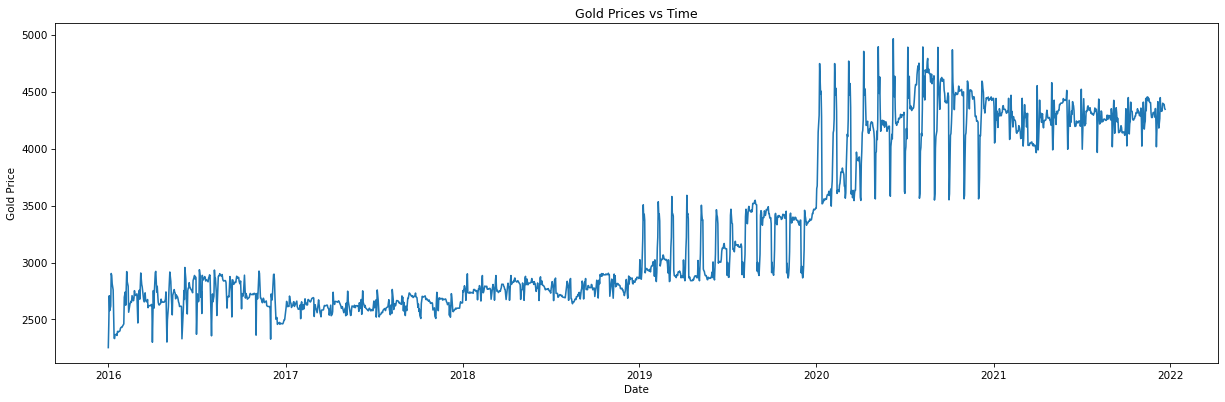

In [44]:
# line plot
plt.figure(figsize=(20, 6))
sns.lineplot(y='price', x='date', data=df);
plt.title('Gold Prices vs Time');
plt.xlabel('Date');
plt.ylabel('Gold Price');

# 4.2 Histogram

(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <BarContainer object of 10 artists>)

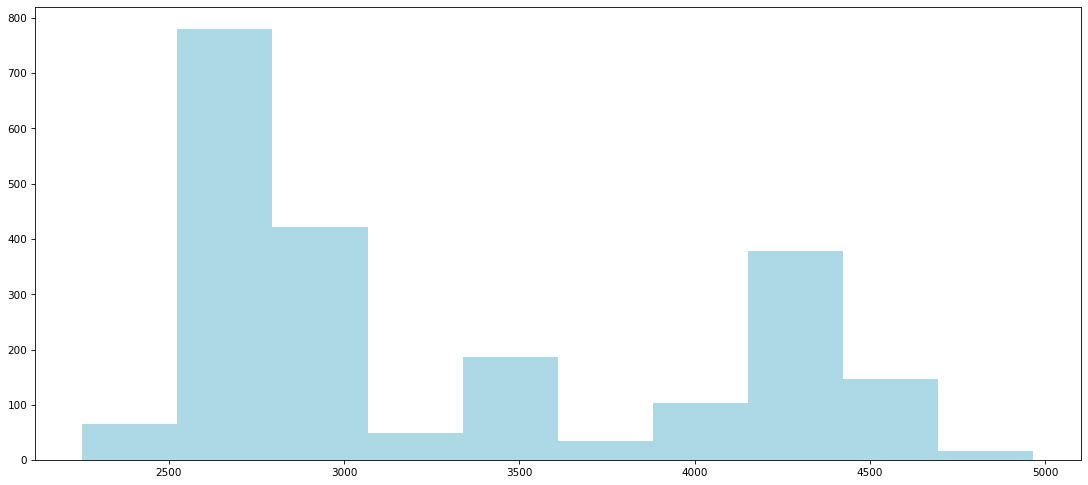

In [45]:
plt.hist(df['price'],color='lightblue')

# From above visual trend we can see that the data has different trend at Different levels hence it is Non-Stationary

# 4.3 A quick box plot
## Find Outliers in data

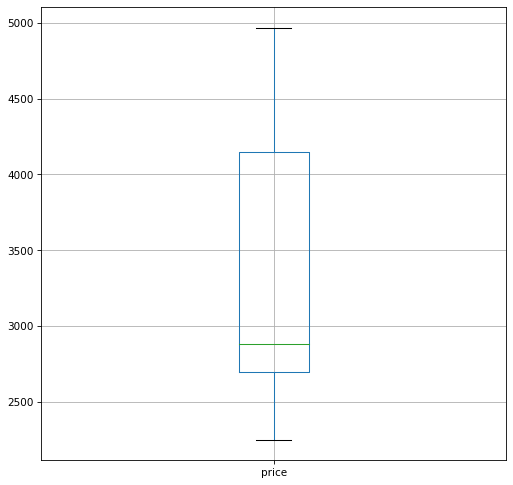

In [46]:
### you can create a box plot for any numerical column using a single line of code.
box=df.boxplot(figsize=(8,8))

## This data have irregular trend with combination of linear & constant treand over the time

# 4.4 Time series decomposition :

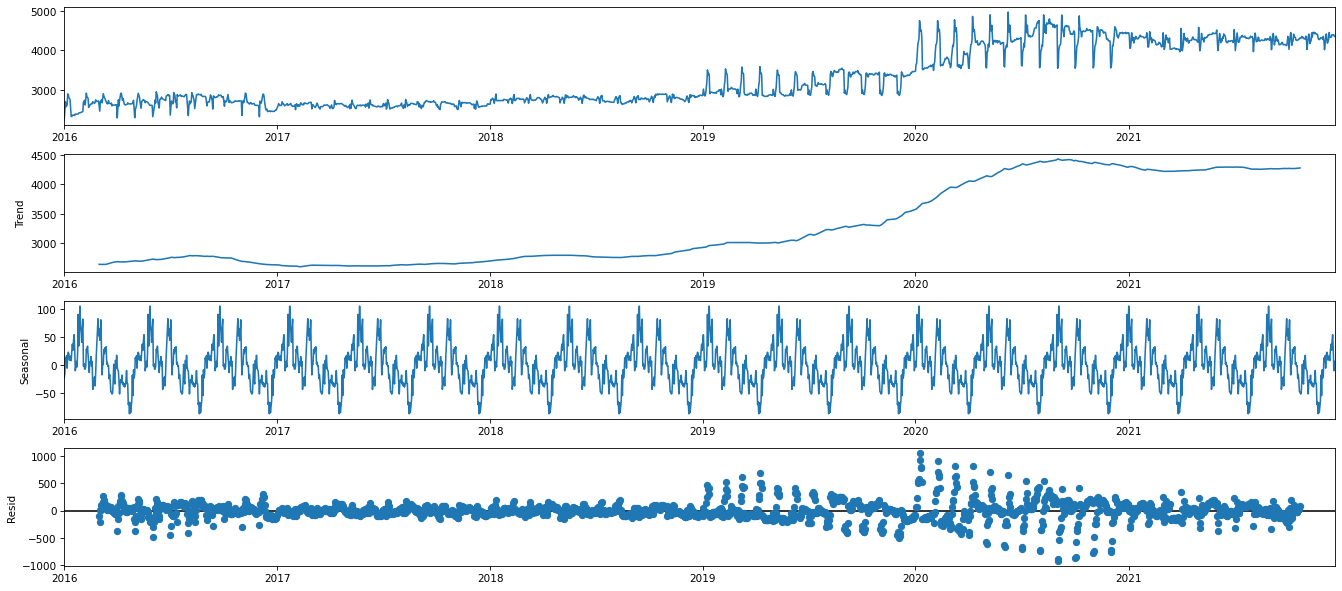

In [47]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(df_eda, model='additive', period=120)
result.plot()
plt.show()

## - Trend - Slow moving changes in a time series, Responisble for making series gradually increase or decrease over time.
## - Seasonality - Seasonal Paterns in the series. The cycles occur repeatedly over a fixed period of time.
## - Residuals - The behaviour of the time series that cannot be explained by the trend and seasonality components. Also called random errors/white noise.

# 4.5Trend
## Visualizing changes in mean over 365 days.

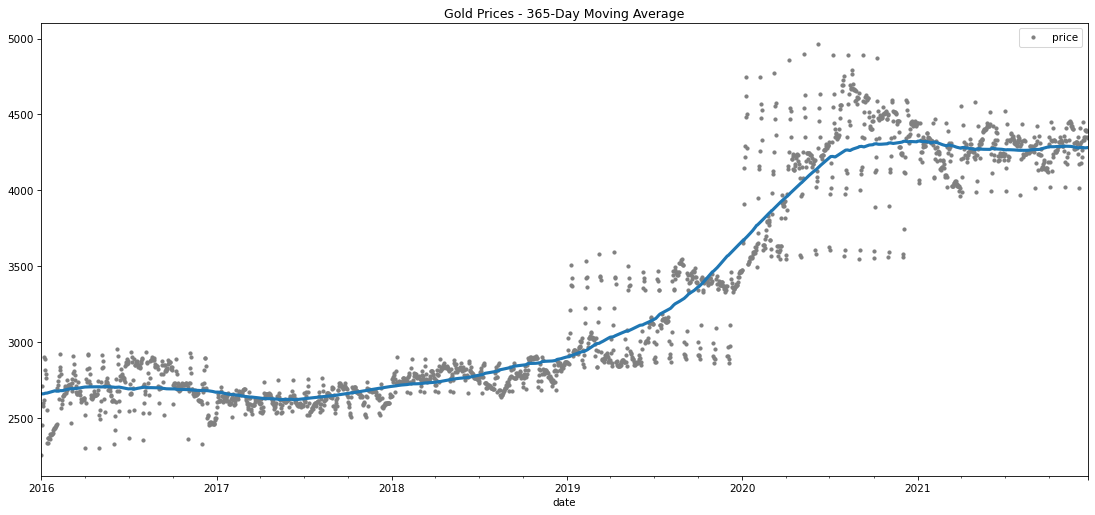

In [48]:
moving_average = df_eda.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_eda.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold Prices - 365-Day Moving Average", legend=False,
);

# From the above plot, we can see that there is no constant direction of the mean (increase/decrease) which is understandable as there might be many external factors involved in price fluctuation.

# 4.6 Displot
## To Check Normality in the Data

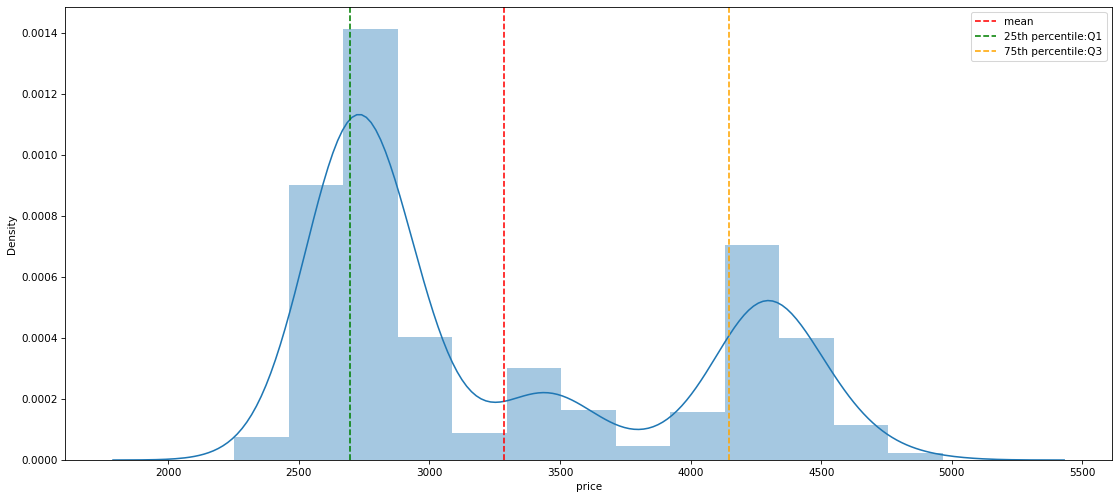

In [49]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

# We can see from above's Displot Data is not Normally Distibuted.

# 4.7 Scatter Plot

In [50]:
plt.figure(figsiz+e=(30,8))
df.plot(kind='scatter',x='date',y='price')
plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3137554833.py, line 1)

# Observation :
## From above visualization we can see that there is variation in the gold price  .

In [51]:
date = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')

# 4.8 Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [52]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = df[['price','year']].groupby(by='year').sum().reset_index()

df_year

,year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


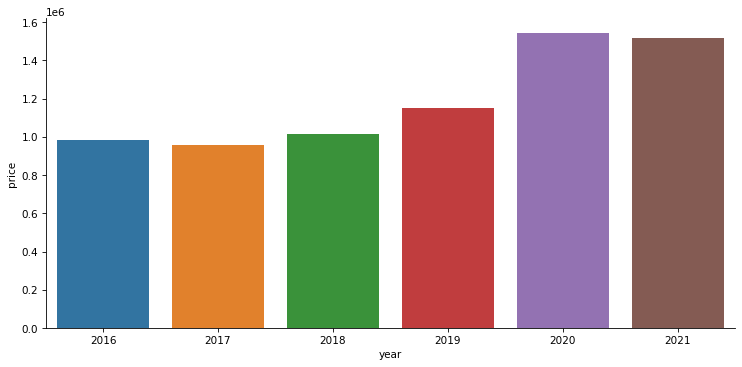

In [53]:
sns.catplot(x='year',y='price',data=df_year,kind='bar',aspect=2)

# Pie Chart

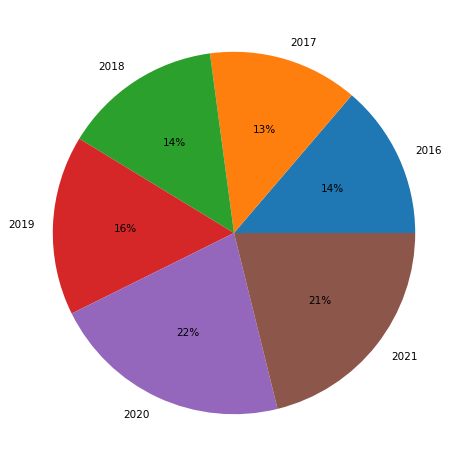

In [54]:
plt.pie(data=df_year,x=df_year['price'],labels=df_year['year'],autopct='%.0f%%')
plt.show()

# Monthly & Yearly Gold Price (TREND & SEASONALITY)

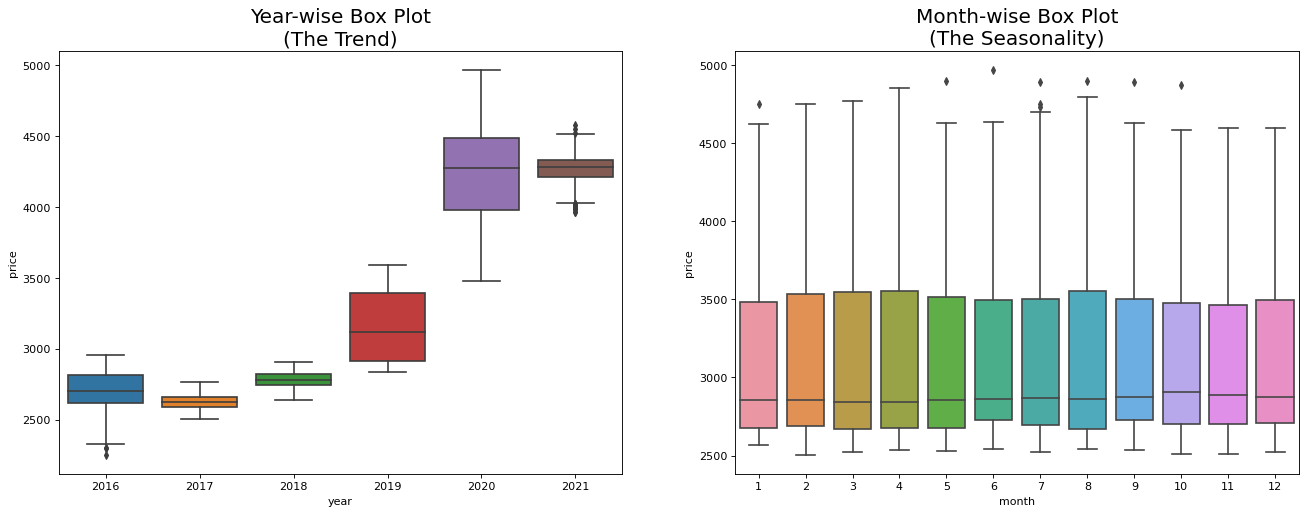

In [55]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month', y='price', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Weekly Gold Price

# 1. Weekly Box Plot

[Text(0.5, 1.0, 'Weekly Gold Price')]

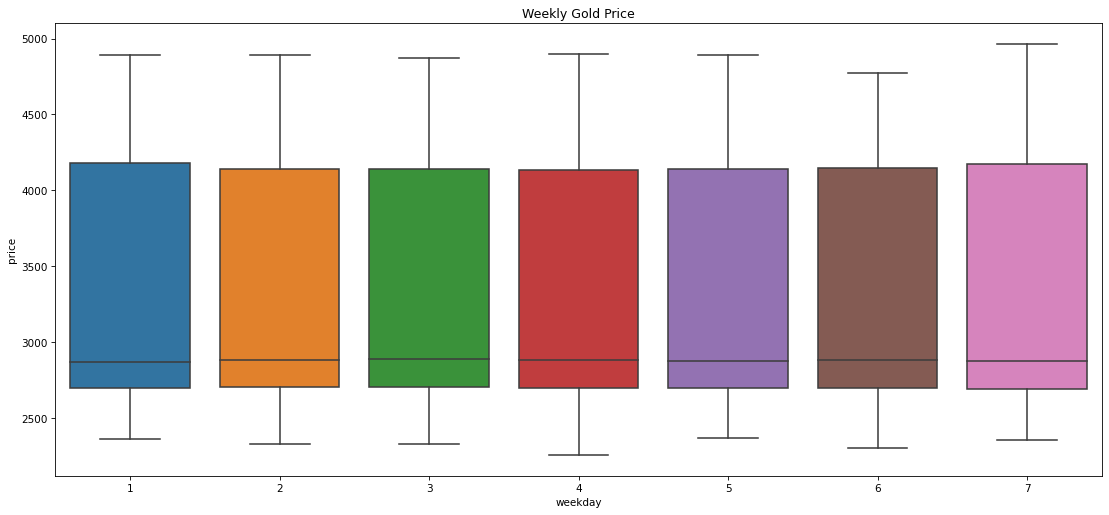

In [56]:
plot = sns.boxplot(x='weekday', y='price', data=df)
plot.set(title='Weekly Gold Price')

# 2. Weekly Violinplot

[Text(0.5, 1.0, 'Weekly Gold-- Price')]

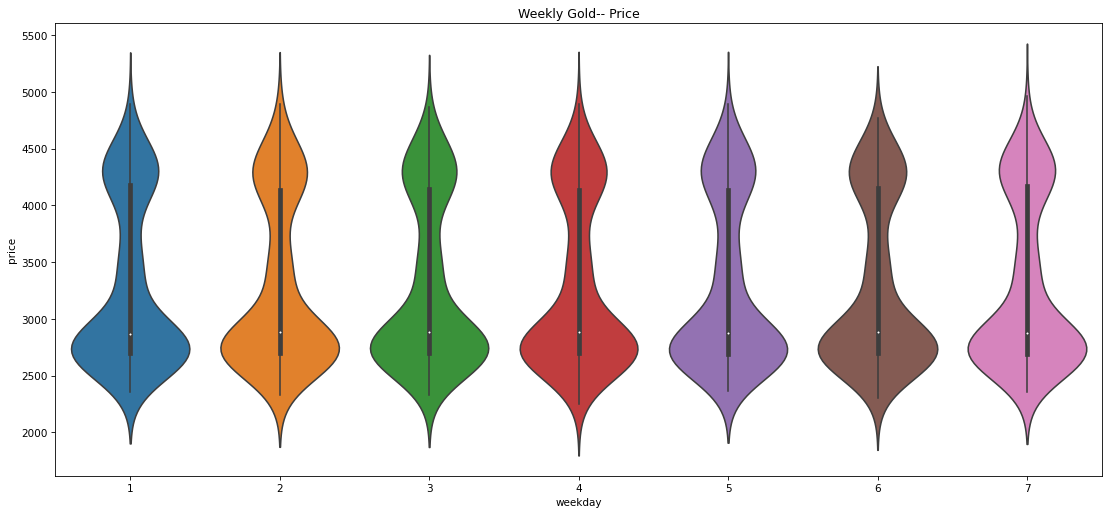

In [57]:
plot1 = sns.violinplot(x='weekday', y='price', data=df)
plot1.set(title='Weekly Gold-- Price')

# 8. Correlation Plot - EDA

### Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [58]:
#Correlation 

df.corr()

,price,year,month,day,weekday
price,1.000000,0.880318,0.075041,0.023311,-0.000928
year,0.880318,1.000000,-0.010417,-0.008684,-0.000735
month,0.075041,-0.010417,1.000000,0.001173,0.002167
day,0.023311,-0.008684,0.001173,1.000000,-0.002243
weekday,-0.000928,-0.000735,0.002167,-0.002243,1.000000


### This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated

<function matplotlib.pyplot.show(close=None, block=None)>

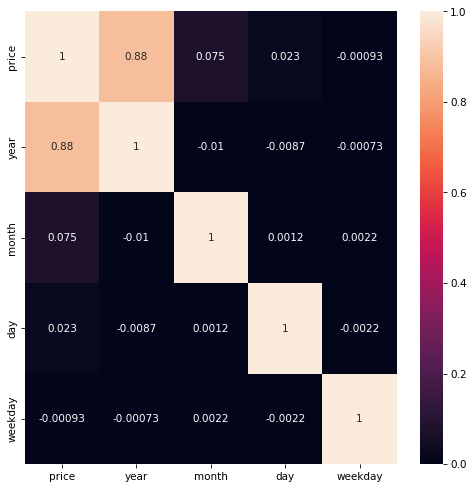

In [59]:
#Correlation plot

corr_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data= corr_matrix,annot=True,vmin=0)
plt.show

# 9. split the data

In [60]:
split=round(len(df)/2)
df_1=df[0:split]
df_2=df[split:]

In [61]:
df_1.mean()

price      2698.965628
year       2016.994500
month         6.496792
day          15.671861
weekday       4.000917
dtype: float64

In [62]:
df_2.mean()

price      3869.934464
year       2019.981668
month         6.496792
day          15.694775
weekday       4.001833
dtype: float64

In [63]:
df_1.var()

price      13222.816357
year           0.666025
month         11.822696
day           77.070207
weekday        4.006421
dtype: float64

In [64]:
df_2.var()

price      336585.171545
year            0.678563
month          11.822696
day            77.566386
weekday         4.003666
dtype: float64

Data splitting 80:20

In [65]:
X_train=df[:1748]
X_test=df[1748:]


print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (1748, 6)
X_test Shape (434, 6)


FORECASTING NINE MONTHS AHEAD

In [66]:
X_train = X_train[['date', 'price']]
X_test = X_test[['date', 'price']]

X_train.set_index('date', inplace=True)
X_test.set_index('date', inplace=True)

In [67]:
index_9_months = pd.date_range(X_test.index[-1], freq='MS', periods=9)
index_9_months

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01'],
              dtype='datetime64[ns]', freq='MS')

DEFINE d USING ADF TEST

In [68]:
from statsmodels.tsa.stattools import adfuller
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(X_train)

ADF Test Statistic : 0.629927280253449
p-value : 0.9883305199769917
#Lags Used : 25
Number of Observations : 1722
Critical Value : {'1%': -3.4341531793003095, '5%': -2.86321989098246, '10%': -2.567664327086377}
** Indicating It Is Non-Stationary **


From above ADF test we came to know that the data is non stationary

Converting non- stationary data into stationary data

In [69]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -19.081273825409866
p-value : 0.0
#Lags Used : 25
Number of Observations : 1721
Critical Value : {'1%': -3.434155392475539, '5%': -2.8632208679350253, '10%': -2.567664847292613}
** Data Is Stationary **


I define d = 1

DEFINE p AND q USING PACF AND ACF PLOT

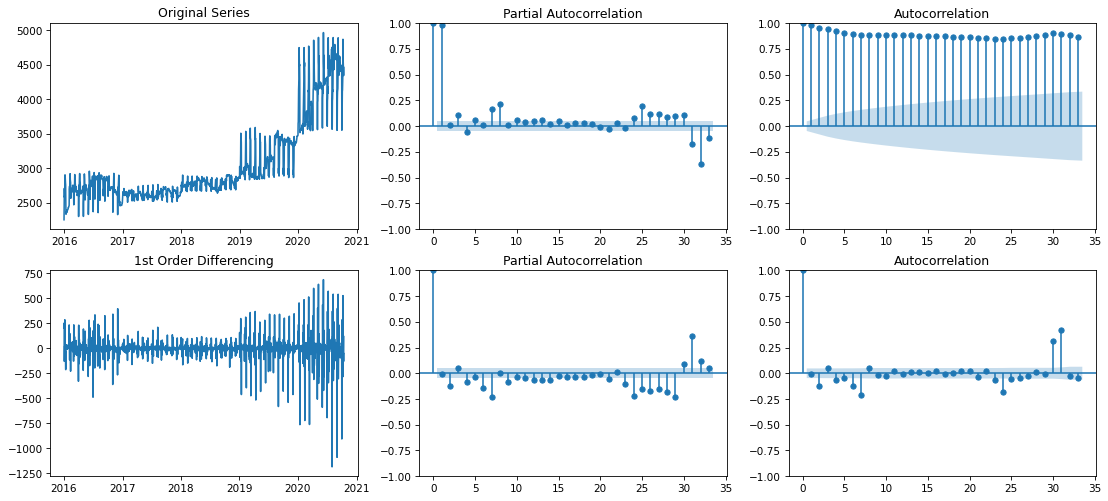

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

plt.show()


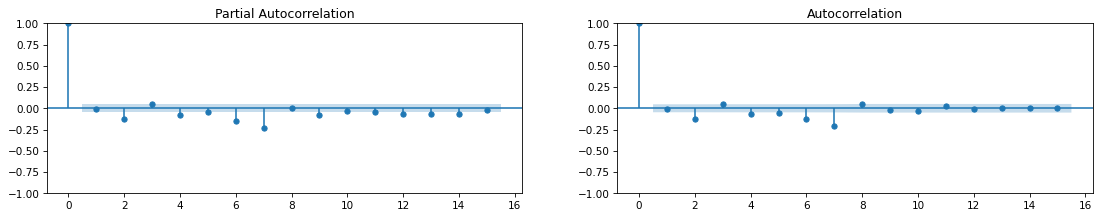

In [71]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

Based on PACF and ACF, I define p = 0 and q = 0

In [72]:
from scipy.stats.mstats import normaltest
normaltest(df.price.values) #not a normal distribution

NormaltestResult(statistic=2809.5574975123573, pvalue=0.0)

In [73]:
log_price = np.log(df.price)
log_price

0       7.719840
1       7.805678
2       7.904003
3       7.854692
4       7.862401
          ...   
2177    8.388086
2178    8.386971
2179    8.386971
2180    8.378873
2181    8.377126
Name: price, Length: 2182, dtype: float64

<AxesSubplot:>

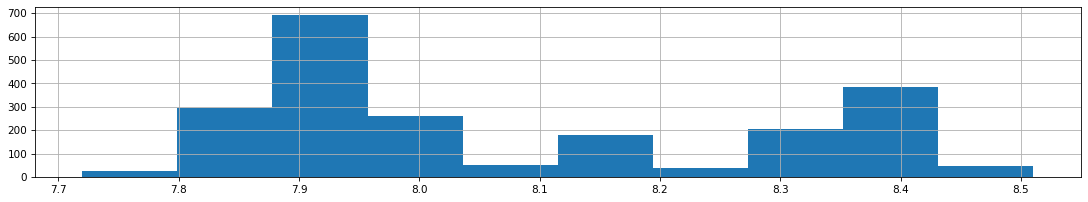

In [74]:
log_price.hist() 

In [75]:
normaltest(log_price)

NormaltestResult(statistic=64795.27133116441, pvalue=0.0)

SQUARE ROOT TRANSFORMATION

(array([ 45., 544., 627.,  93., 135.,  83.,  55., 355., 218.,  27.]),
 array([47.4615634 , 49.76260508, 52.06364677, 54.36468845, 56.66573014,
        58.96677182, 61.26781351, 63.56885519, 65.86989688, 68.17093856,
        70.47198025]),
 <BarContainer object of 10 artists>)

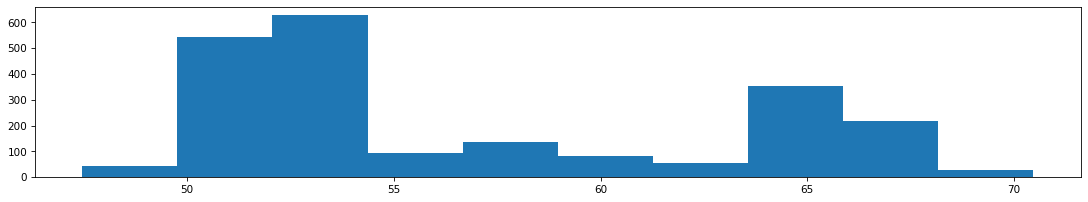

In [76]:
sqrt_price = np.sqrt(df.price)
plt.hist(sqrt_price)

In [77]:
normaltest(sqrt_price)

NormaltestResult(statistic=7072.617486825243, pvalue=0.0)

## Looking at the above results the mean and variance of the first part is very different from the second part. It shows another indication of non-stationary Of the data.

In [78]:
!pip install pandas_profiling

In [79]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html('Gold_Price.html')

In [121]:
#Forecasting - Model Based


In [122]:
heatmapdata = df[['date','price']]
heatmapdata['date'] = pd.to_datetime(heatmapdata['date'])
heatmapdata

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [123]:

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

heatmapdata["month"] = heatmapdata['date'].dt.strftime("%b") # month extraction
heatmapdata["year"] = heatmapdata['date'].dt.strftime("%Y") # year extraction
heatmapdata["Day"] = heatmapdata['date'].dt.strftime("%d") # Day extraction
heatmapdata["wkday"] = heatmapdata['date'].dt.strftime("%A") # weekday extraction

heatmapdata

,date,price,month,year,Day,wkday
0,2016-01-01,2252.60,Jan,2016,01,Friday
1,2016-01-02,2454.50,Jan,2016,02,Saturday
2,2016-01-03,2708.10,Jan,2016,03,Sunday
3,2016-01-04,2577.80,Jan,2016,04,Monday
4,2016-01-05,2597.75,Jan,2016,05,Tuesday
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,17,Friday
2178,2021-12-18,4389.50,Dec,2021,18,Saturday
2179,2021-12-19,4389.50,Dec,2021,19,Sunday
2180,2021-12-20,4354.10,Dec,2021,20,Monday


In [125]:
heatmap_y_month = pd.pivot_table(data = heatmapdata,
                                 values = "price",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month1 = heatmap_y_month[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
heatmap_y_month1

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,2495.832258,2688.703448,2682.854839,2677.790000,2677.650000,2745.596667,2779.582258,2792.240323,2792.705000,2720.454839,2674.280000,2563.683333
2017,2626.077957,2646.730357,2597.485484,2620.758333,2605.872581,2607.733333,2599.256452,2642.133871,2669.835000,2648.345161,2646.371667,2612.683871
2018,2748.438710,2766.942857,2766.806452,2806.903333,2806.258065,2781.715000,2739.325806,2722.327419,2777.303333,2851.996774,2789.446667,2825.232258
2019,3015.954839,3068.482143,2989.967742,2970.890000,2978.335484,3098.686667,3136.961290,3351.954839,3310.843333,3300.645161,3274.526667,3299.116129
2020,3803.264516,3903.472414,3915.170968,4187.580000,4208.000000,4250.550000,4393.832258,4491.829032,4399.250000,4388.651613,4312.750000,4331.187097
2021,4305.209677,4208.853571,4118.264516,4259.273333,4346.348387,4262.783333,4308.632258,4264.919355,4207.506667,4289.148387,4327.633333,4312.733333


<AxesSubplot:xlabel='month', ylabel='year'>

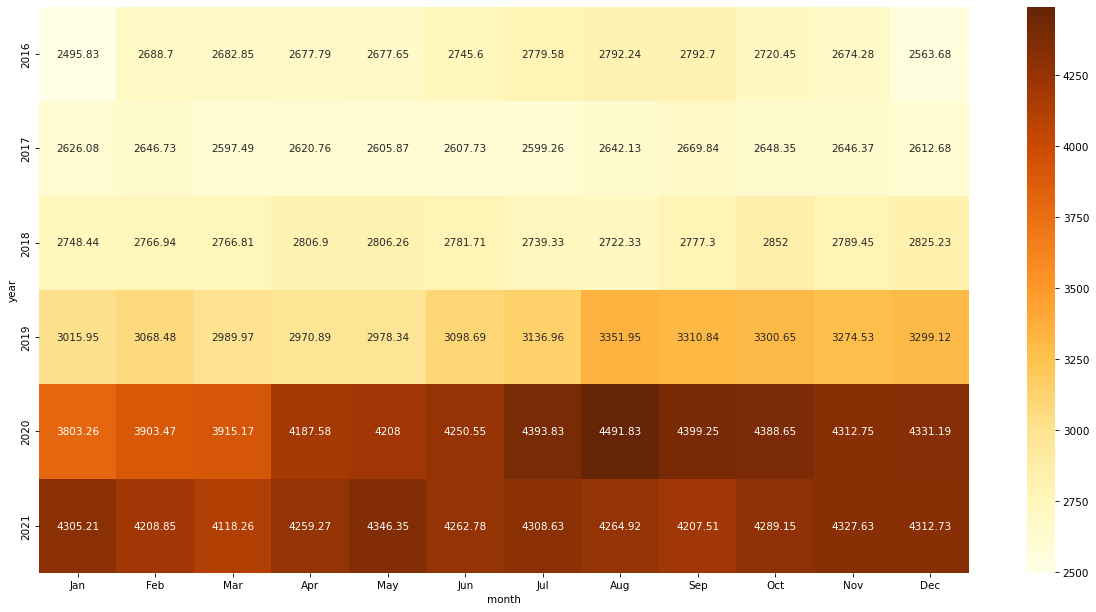

In [127]:
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_y_month1,
            annot=True,
            fmt="g",
            cmap = 'YlOrBr')

# Splitting data

In [128]:
split=round(len(df)/2)
df_1=df[0:split]
df_2=df[split:]

In [129]:
df_1

,date,price,year,month,day,weekday
0,2016-01-01,2252.60,2016,1,1,4
1,2016-01-02,2454.50,2016,1,2,5
2,2016-01-03,2708.10,2016,1,3,6
3,2016-01-04,2577.80,2016,1,4,7
4,2016-01-05,2597.75,2016,1,5,1
...,...,...,...,...,...,...
1086,2018-12-22,2827.70,2018,12,22,5
1087,2018-12-23,2827.30,2018,12,23,6
1088,2018-12-24,2851.90,2018,12,24,7
1089,2018-12-25,2857.40,2018,12,25,1


In [130]:
df_2

,date,price,year,month,day,weekday
1091,2018-12-27,2871.5,2018,12,27,3
1092,2018-12-28,2869.0,2018,12,28,4
1093,2018-12-29,2869.0,2018,12,29,5
1094,2018-12-30,2869.0,2018,12,30,6
1095,2018-12-31,2859.1,2018,12,31,7
...,...,...,...,...,...,...
2177,2021-12-17,4394.4,2021,12,17,4
2178,2021-12-18,4389.5,2021,12,18,5
2179,2021-12-19,4389.5,2021,12,19,6
2180,2021-12-20,4354.1,2021,12,20,7


In [131]:
df_1['t'] = np.arange(1,df_1.shape[0]+1)
df_1['t_square'] = np.square(df_1.t)
df_1['log_price'] = np.log(df_1.price)
df_2 = pd.get_dummies(df_1['month'])
df_1 = pd.concat([df_1, df_2],axis=1)
df_1 = df_1.reset_index(drop = True)
df_1

,date,price,year,month,day,weekday,t,t_square,log_price,1,...,3,4,5,6,7,8,9,10,11,12
0,2016-01-01,2252.60,2016,1,1,4,1,1,7.719840,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,1,2,5,2,4,7.805678,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,1,3,6,3,9,7.904003,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,1,4,7,4,16,7.854692,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,1,5,1,5,25,7.862401,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2018-12-22,2827.70,2018,12,22,5,1087,1181569,7.947219,0,...,0,0,0,0,0,0,0,0,0,1
1087,2018-12-23,2827.30,2018,12,23,6,1088,1183744,7.947077,0,...,0,0,0,0,0,0,0,0,0,1
1088,2018-12-24,2851.90,2018,12,24,7,1089,1185921,7.955741,0,...,0,0,0,0,0,0,0,0,0,1
1089,2018-12-25,2857.40,2018,12,25,1,1090,1188100,7.957667,0,...,0,0,0,0,0,0,0,0,0,1


In [132]:

# Using 3/4th data for training and remaining for testing
test_size = round(0.25 * (df_1.shape[0]+1))

Train = df_1[:-test_size]
Test = df_1[-test_size:]

In [133]:
Train

,date,price,year,month,day,weekday,t,t_square,log_price,1,...,3,4,5,6,7,8,9,10,11,12
0,2016-01-01,2252.60,2016,1,1,4,1,1,7.719840,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,1,2,5,2,4,7.805678,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,1,3,6,3,9,7.904003,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,1,4,7,4,16,7.854692,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,1,5,1,5,25,7.862401,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2018-03-24,2809.10,2018,3,24,5,814,662596,7.940619,0,...,1,0,0,0,0,0,0,0,0,0
814,2018-03-25,2808.90,2018,3,25,6,815,664225,7.940548,0,...,1,0,0,0,0,0,0,0,0,0
815,2018-03-26,2808.70,2018,3,26,7,816,665856,7.940477,0,...,1,0,0,0,0,0,0,0,0,0
816,2018-03-27,2791.80,2018,3,27,1,817,667489,7.934442,0,...,1,0,0,0,0,0,0,0,0,0


In [134]:
Test

,date,price,year,month,day,weekday,t,t_square,log_price,1,...,3,4,5,6,7,8,9,10,11,12
818,2018-03-29,2765.600000,2018,3,29,3,819,670761,7.925013,0,...,1,0,0,0,0,0,0,0,0,0
819,2018-03-30,2763.500000,2018,3,30,4,820,672400,7.924253,0,...,1,0,0,0,0,0,0,0,0,0
820,2018-03-31,2719.300000,2018,3,31,5,821,674041,7.908130,0,...,1,0,0,0,0,0,0,0,0,0
821,2018-04-01,2675.100000,2018,4,1,6,822,675684,7.891742,0,...,0,1,0,0,0,0,0,0,0,0
822,2018-04-02,2713.566667,2018,4,2,7,823,677329,7.906019,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2018-12-22,2827.700000,2018,12,22,5,1087,1181569,7.947219,0,...,0,0,0,0,0,0,0,0,0,1
1087,2018-12-23,2827.300000,2018,12,23,6,1088,1183744,7.947077,0,...,0,0,0,0,0,0,0,0,0,1
1088,2018-12-24,2851.900000,2018,12,24,7,1089,1185921,7.955741,0,...,0,0,0,0,0,0,0,0,0,1
1089,2018-12-25,2857.400000,2018,12,25,1,1090,1188100,7.957667,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
#Trying basic models

In [136]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=df_1).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2))
rmse_linear

72.76905492402065

In [137]:

#Exponential
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

130.91306667849844

In [138]:
#Quadratic 
Quad = smf.ols('price~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

81.39432301195455

In [141]:
#Additive seasonality 
add_sea = smf.ols('price~month',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

133.165995234455

In [142]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('price~t+t_square+month',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

76.63723271066006

In [143]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_price~month',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.21835157078425

In [144]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_price~t+month',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 
     

130.8942417755272

In [145]:

#Compare the results 
datamodel = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(datamodel)
table = table_rmse.sort_values(['RMSE_Values'],ignore_index = True)
table
     

,MODEL,RMSE_Values
0,rmse_linear,72.769055
1,rmse_add_sea_quad,76.637233
2,rmse_Quad,81.394323
3,rmse_Mult_add_sea,130.894242
4,rmse_Exp,130.913067
5,rmse_add_sea,133.165995
6,rmse_Mult_sea,135.218352


In [146]:
bestmodel = table.iloc[0,0]
bestmodel

if bestmodel == "rmse_linear" :
  formula = 'price~t'

if bestmodel == "rmse_Exp":
  formula = 'log_price~t'

if bestmodel == "rmse_Quad" :
  formula = 'price~t+t_square'

if bestmodel == "rmse_add_sea":
  formula = 'price~month'

if bestmodel == "rmse_add_sea_quad":
  formula = 'price~t+t_square+month'

if bestmodel == "rmse_Mult_sea":
  formula = 'log_price~month'

if bestmodel == "rmse_Mult_add_sea":
  formula = 'log_price~t+month'

formula

'price~t'

In [148]:
#Build the model on entire data set
model_full = smf.ols(formula,data=df_1).fit()

In [149]:
pred_new  = pd.Series(model_full.predict(df_1))
pred_new
     

0       2631.180825
1       2631.305201
2       2631.429576
3       2631.553952
4       2631.678328
           ...     
1086    2766.252928
1087    2766.377303
1088    2766.501679
1089    2766.626055
1090    2766.750431
Length: 1091, dtype: float64

In [153]:
if bestmodel == ("rmse_Exp" or "rmse_Mult_sea" or "rmse_Mult_add_sea"):
  df_1["forecasted_price"] = pd.Series(np.exp(pred_new))
else:
  df_1["forecasted_price"] = pd.Series((pred_new))

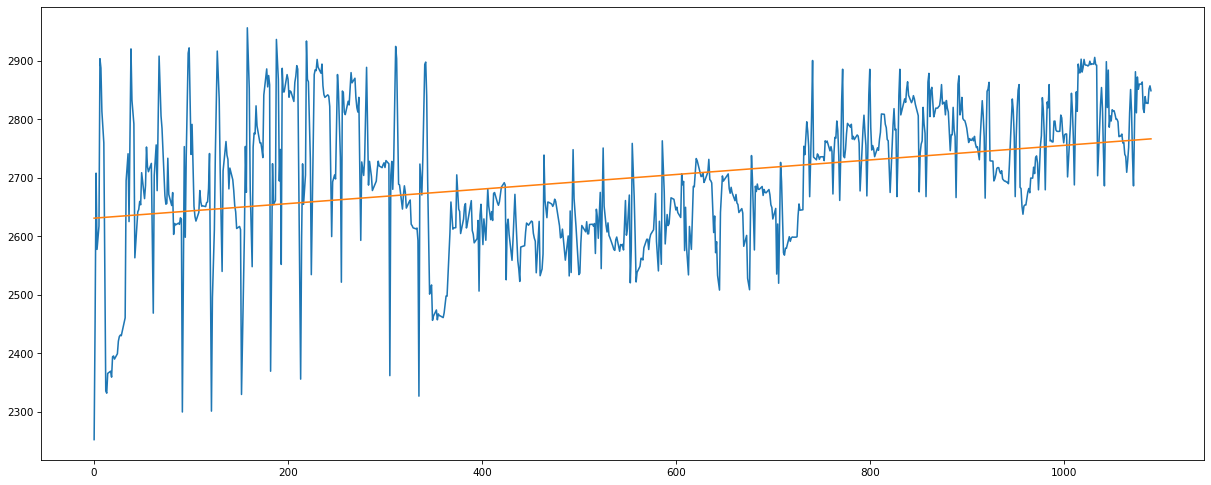

In [155]:
plt.figure(figsize = (20,8))

plt.plot(df_1[['price','forecasted_price']].reset_index(drop=True))

In [156]:
df_1

,date,price,year,month,day,weekday,t,t_square,log_price,1,...,5,6,7,8,9,10,11,12,forecasted_close,forecasted_price
0,2016-01-01,2252.60,2016,1,1,4,1,1,7.719840,1,...,0,0,0,0,0,0,0,0,2631.180825,2631.180825
1,2016-01-02,2454.50,2016,1,2,5,2,4,7.805678,1,...,0,0,0,0,0,0,0,0,2631.305201,2631.305201
2,2016-01-03,2708.10,2016,1,3,6,3,9,7.904003,1,...,0,0,0,0,0,0,0,0,2631.429576,2631.429576
3,2016-01-04,2577.80,2016,1,4,7,4,16,7.854692,1,...,0,0,0,0,0,0,0,0,2631.553952,2631.553952
4,2016-01-05,2597.75,2016,1,5,1,5,25,7.862401,1,...,0,0,0,0,0,0,0,0,2631.678328,2631.678328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2018-12-22,2827.70,2018,12,22,5,1087,1181569,7.947219,0,...,0,0,0,0,0,0,0,1,2766.252928,2766.252928
1087,2018-12-23,2827.30,2018,12,23,6,1088,1183744,7.947077,0,...,0,0,0,0,0,0,0,1,2766.377303,2766.377303
1088,2018-12-24,2851.90,2018,12,24,7,1089,1185921,7.955741,0,...,0,0,0,0,0,0,0,1,2766.501679,2766.501679
1089,2018-12-25,2857.40,2018,12,25,1,1090,1188100,7.957667,0,...,0,0,0,0,0,0,0,1,2766.626055,2766.626055


In [157]:
#Forecasting - Data Driven


In [158]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose


# Moving Average

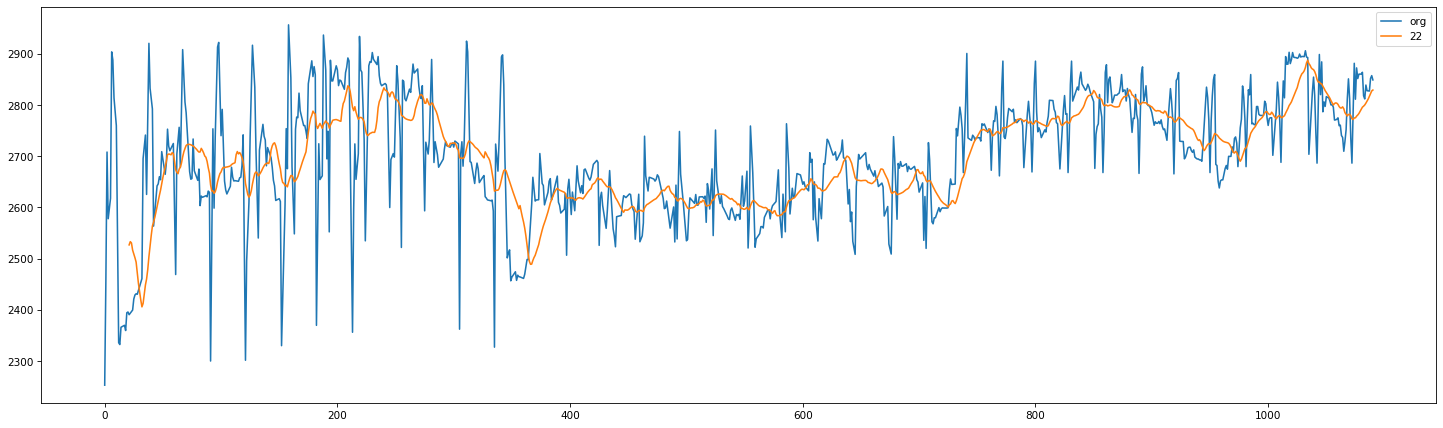

In [232]:

x=22

plt.figure(figsize=(24,7))
df_1['price'].plot(label="org")
df_1["price"].rolling(x).mean().plot(label=str(x))
plt.legend(loc='best')

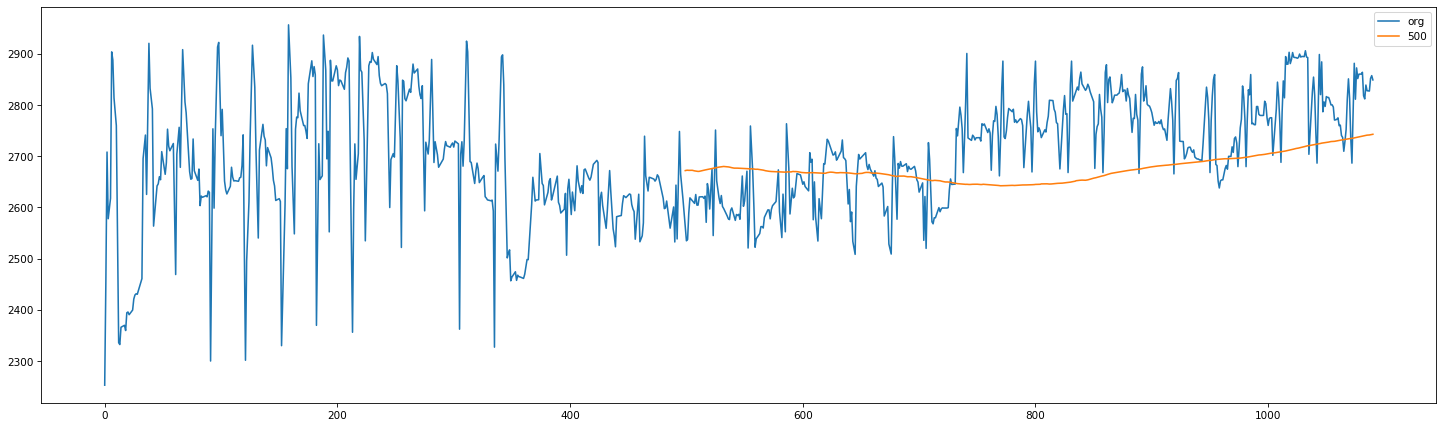

In [233]:

plt.figure(figsize=(24,7))
df_1['price'].plot(label="org")
for i in range(500,2000,3000):
    df_1["price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Evaluation Metric RMSE


In [162]:

def RMSE(pred,org):
  MSE = np.square(np.subtract(org,pred)).mean()   
  return np.sqrt(MSE)

# Simple Exponential Method


In [163]:

ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmseses = RMSE(pred_ses,Test.price)

# Holt method


In [164]:
# Holt method 
hw_model = Holt(Train["price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmsehw = RMSE(pred_hw,Test.price) 

# Holts winter exponential smoothing with additive seasonality and additive trend


In [169]:
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmsehwaa = RMSE(pred_hwe_add_add,Test.price)

# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [167]:
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=365).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmsehwma = RMSE(pred_hwe_mul_add,Test.price)

# Final Model by combining train and test


In [170]:
#Compare the results 
datamodel1 = {"MODEL":pd.Series(["rmse_ses","rmse_hw","rmse_hwe_add_add","rmse_hwe_mul_add"]),"RMSE_Values":pd.Series([rmseses,rmsehw,rmsehwaa,rmsehwma])}
table_rmse1 = pd.DataFrame(datamodel1)
table1 = table_rmse1.sort_values(['RMSE_Values'],ignore_index = True)
table1

,MODEL,RMSE_Values
0,rmse_ses,63.046564
1,rmse_hw,89.161736
2,rmse_hwe_mul_add,129.814385
3,rmse_hwe_add_add,1852.016719


In [172]:
bestmodel1 = table1.iloc[0,0]
bestmodel1

if bestmodel1 == "rmse_hwe_add_add" :
  formula1 = ExponentialSmoothing(df["price"],seasonal="add",trend="add",seasonal_periods=365).fit()

if bestmodel1 == "rmse_hwe_mul_add":
  formula1 = ExponentialSmoothing(df["price"],seasonal="mul",trend="add",seasonal_periods=365).fit()

if bestmodel1 == "rmse_ses" :
  formula1 = SimpleExpSmoothing(df["price"]).fit(smoothing_level=0.2)

if bestmodel1 == "rmse_hw":
  formula1 = Holt(df["price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)

In [181]:
#Forecasting for next 3 time periods
forecasted = formula1.forecast(25)

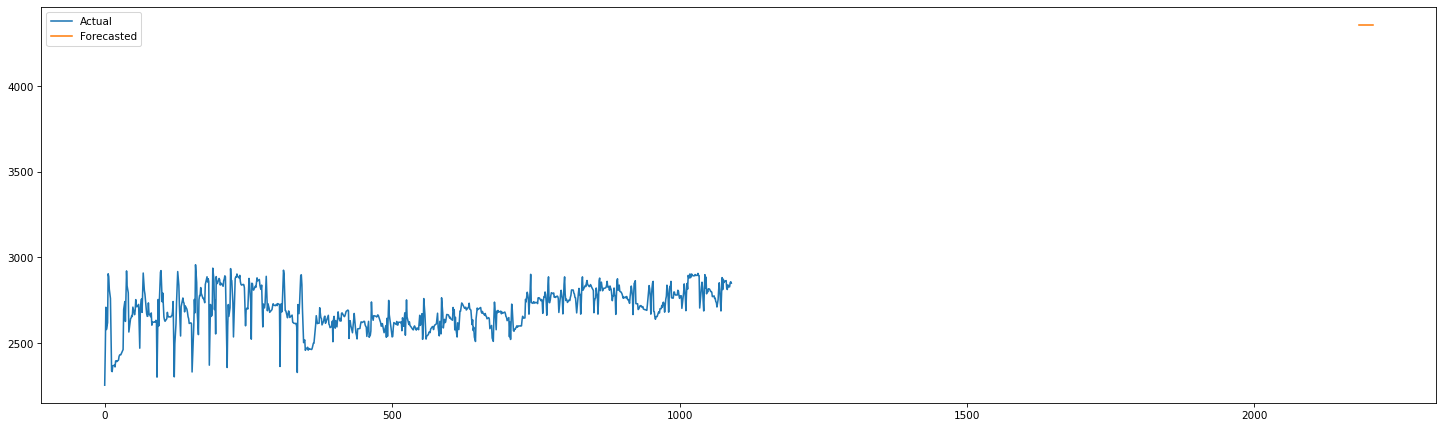

In [182]:
plt.figure(figsize=(24,7))
plt.plot(df_1.price, label = "Actual")
plt.plot(forecasted, label = "Forecasted")
plt.legend()

In [183]:
df

,date,price,year,month,day,weekday
0,2016-01-01,2252.60,2016,1,1,4
1,2016-01-02,2454.50,2016,1,2,5
2,2016-01-03,2708.10,2016,1,3,6
3,2016-01-04,2577.80,2016,1,4,7
4,2016-01-05,2597.75,2016,1,5,1
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,17,4
2178,2021-12-18,4389.50,2021,12,18,5
2179,2021-12-19,4389.50,2021,12,19,6
2180,2021-12-20,4354.10,2021,12,20,7


In [203]:
newdf = df.drop(['month','year','day','weekday'],axis = 1)
newdf

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [210]:
newdf


,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [231]:
newdf=df.set_index('date')
newdf


,price,year,month,day,weekday
date,,,,,
2016-01-01,2252.60,2016,1,1,4
2016-01-02,2454.50,2016,1,2,5
2016-01-03,2708.10,2016,1,3,6
2016-01-04,2577.80,2016,1,4,7
2016-01-05,2597.75,2016,1,5,1
...,...,...,...,...,...
2021-12-17,4394.40,2021,12,17,4
2021-12-18,4389.50,2021,12,18,5
2021-12-19,4389.50,2021,12,19,6


In [227]:
newdf['date'] = pd.to_datetime(newdf['date'])
newdf

KeyError: 'date'

In [226]:
newdf=newdf(['month','year','day','weekday'],axis = 1)

TypeError: 'DataFrame' object is not callable

In [188]:
#creating train and test sets
dataset = newdf
test_size = round(0.25 * (dataset.shape[0]+1))

train = df[:-test_size]
valid = df[-test_size:]


In [213]:
#converting dataset into x_train and y_train
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(newdf)

x_train, y_train = [], []
for i in range(46,len(train)):
    x_train.append(scaled_data[i-46:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [217]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [218]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

1590/1590 - 71s - loss: 0.0042 - 71s/epoch - 45ms/step


In [223]:
#predicting 896 values, using past 46 from the train data
inputs = newdf[len(newdf) - len(valid) - 46:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(46,inputs.shape[0]):
    X_test.append(inputs[i-46:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

ValueError: X has 1 features, but MinMaxScaler is expecting 5 features as input.

In [224]:
# Results
rms=np.sqrt(np.mean(np.power((valid-price),2)))
rms

NameError: name 'price' is not defined